# Load Data

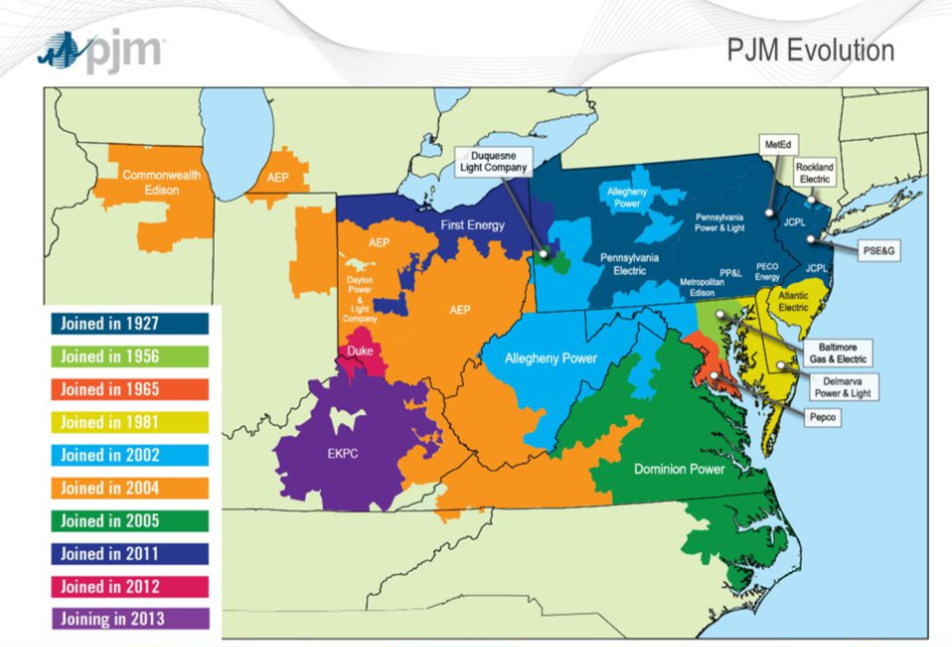

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_parquet('DataSet/est_hourly.paruqet', engine='pyarrow')

# Understand the Data With Descriptive Statistics

## 1. Take a peek at data

In [3]:
data.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


In [4]:
# Les colonnes correspondent aux differents fournisseurs d'éléctricité aux USA

## 2. Review the dimensions of dataset

In [5]:
data.shape

(178262, 12)

## 3. Review the data types of attributes

In [6]:
data.dtypes

AEP         float64
COMED       float64
DAYTON      float64
DEOK        float64
DOM         float64
DUQ         float64
EKPC        float64
FE          float64
NI          float64
PJME        float64
PJMW        float64
PJM_Load    float64
dtype: object

## 3.Descriptive Statistics

In [7]:
data.describe()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
count,121273.000000,66497.000000,121275.000000,57739.000000,116189.000000,119068.000000,45334.000000,62874.000000,58450.000000,145366.000000,143206.000000,32896.000000
mean,15499.513717,11420.152112,2037.851140,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,29766.427408
std,2591.399065,2304.139517,393.403153,599.859026,2413.946569,301.740640,378.868404,1331.268006,2371.498701,6464.012166,979.142872,5849.769954
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,14544.000000,487.000000,17461.000000
25%,13630.000000,9780.000000,1749.000000,2687.000000,9322.000000,1444.000000,1185.000000,6807.000000,9954.000000,27573.000000,4907.000000,25473.000000
50%,15310.000000,11152.000000,2009.000000,3013.000000,10501.000000,1630.000000,1386.000000,7700.000000,11521.000000,31421.000000,5530.000000,29655.000000
75%,17200.000000,12510.000000,2279.000000,3449.000000,12378.000000,1819.000000,1699.000000,8556.000000,12896.750000,35650.000000,6252.000000,33073.250000
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,62009.000000,9594.000000,54030.000000


The Data Set contain 12 columns, each column describe the company estimated energy consumption in Megawatts (MW) per hour. 

## 4.Correlations Between Attributes

<AxesSubplot:>

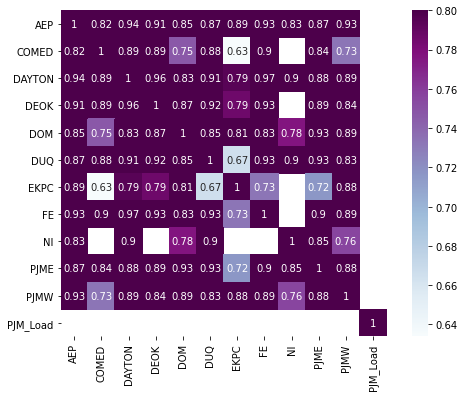

In [8]:
# Correclation Matrix
import matplotlib.pyplot as plt
import seaborn as sns
matrix = data.corr(method='pearson')
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

We note a high correlation between DEOK and DAYTON concumptions

## 5.Skew of Univariate Distributions

In [9]:
data.skew()

AEP         0.378998
COMED       1.161846
DAYTON      0.523796
DEOK        0.676583
DOM         0.698117
DUQ         0.851328
EKPC        0.948599
FE          0.664220
NI          0.972439
PJME        0.739012
PJMW        0.334853
PJM_Load    0.557544
dtype: float64

The skew result show a positive (right)

# Understand Data With Visualisation

### Data Distribution

In [10]:
# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

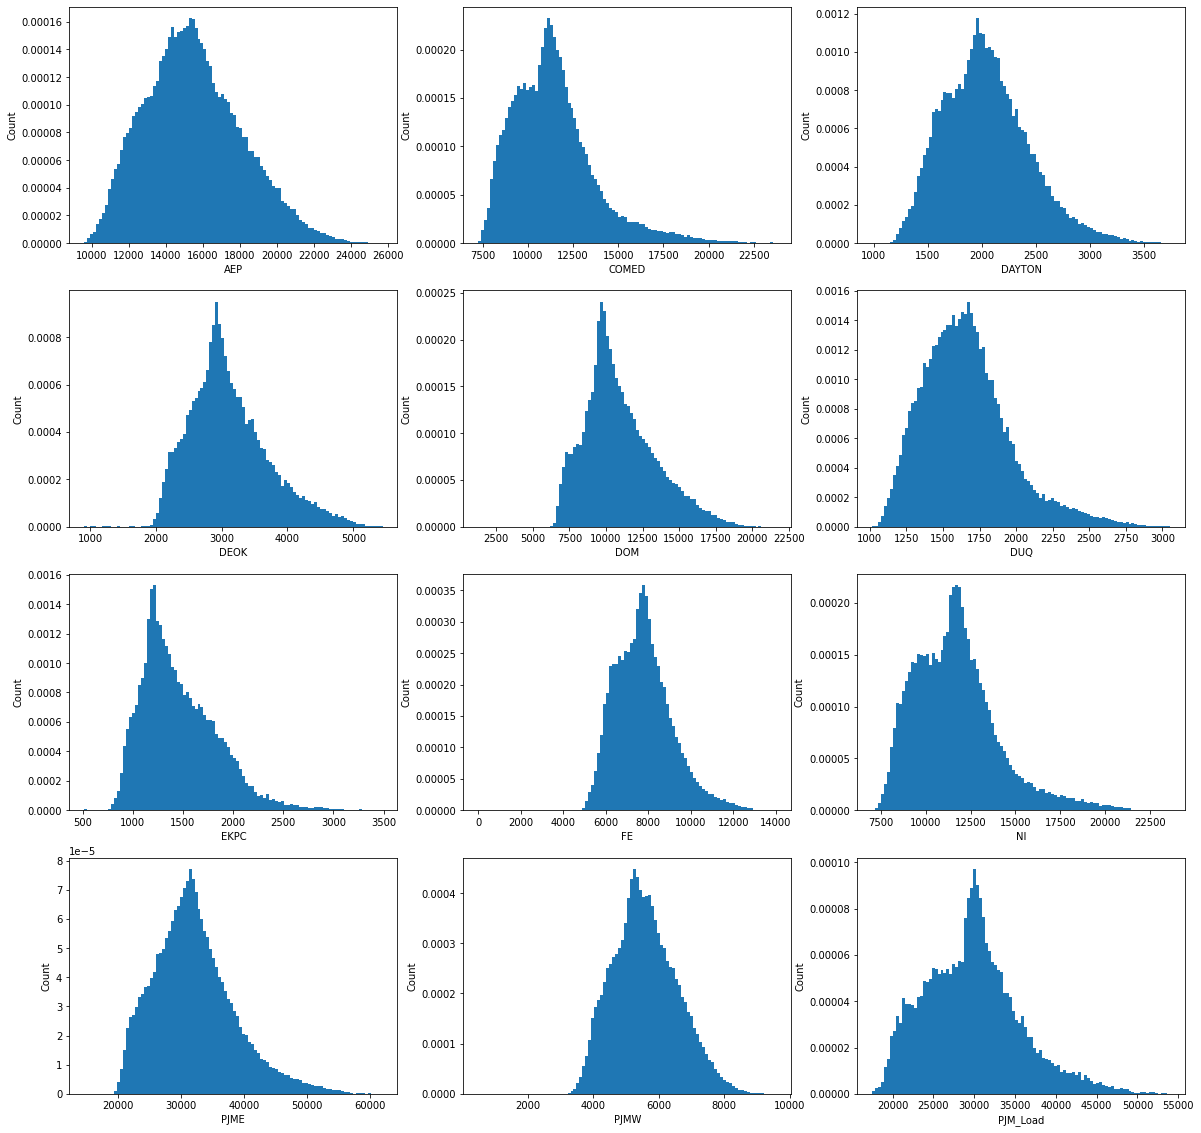

In [11]:
plt.figure(figsize = [20, 20])

for i,x in enumerate(data.columns):
    plt.subplot(4,3,i+1)
    plt.hist(data[x], bins = 100,density=True)
    plt.xlabel(x, fontsize=10)
    plt.ylabel('Count', fontsize=10)

1) The Data follow a normal distribution with positif (left) skew
 
2) The Consumption recorded by EKPC is lower than the other companies

### Consumption evolution per company 

In [12]:
data.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


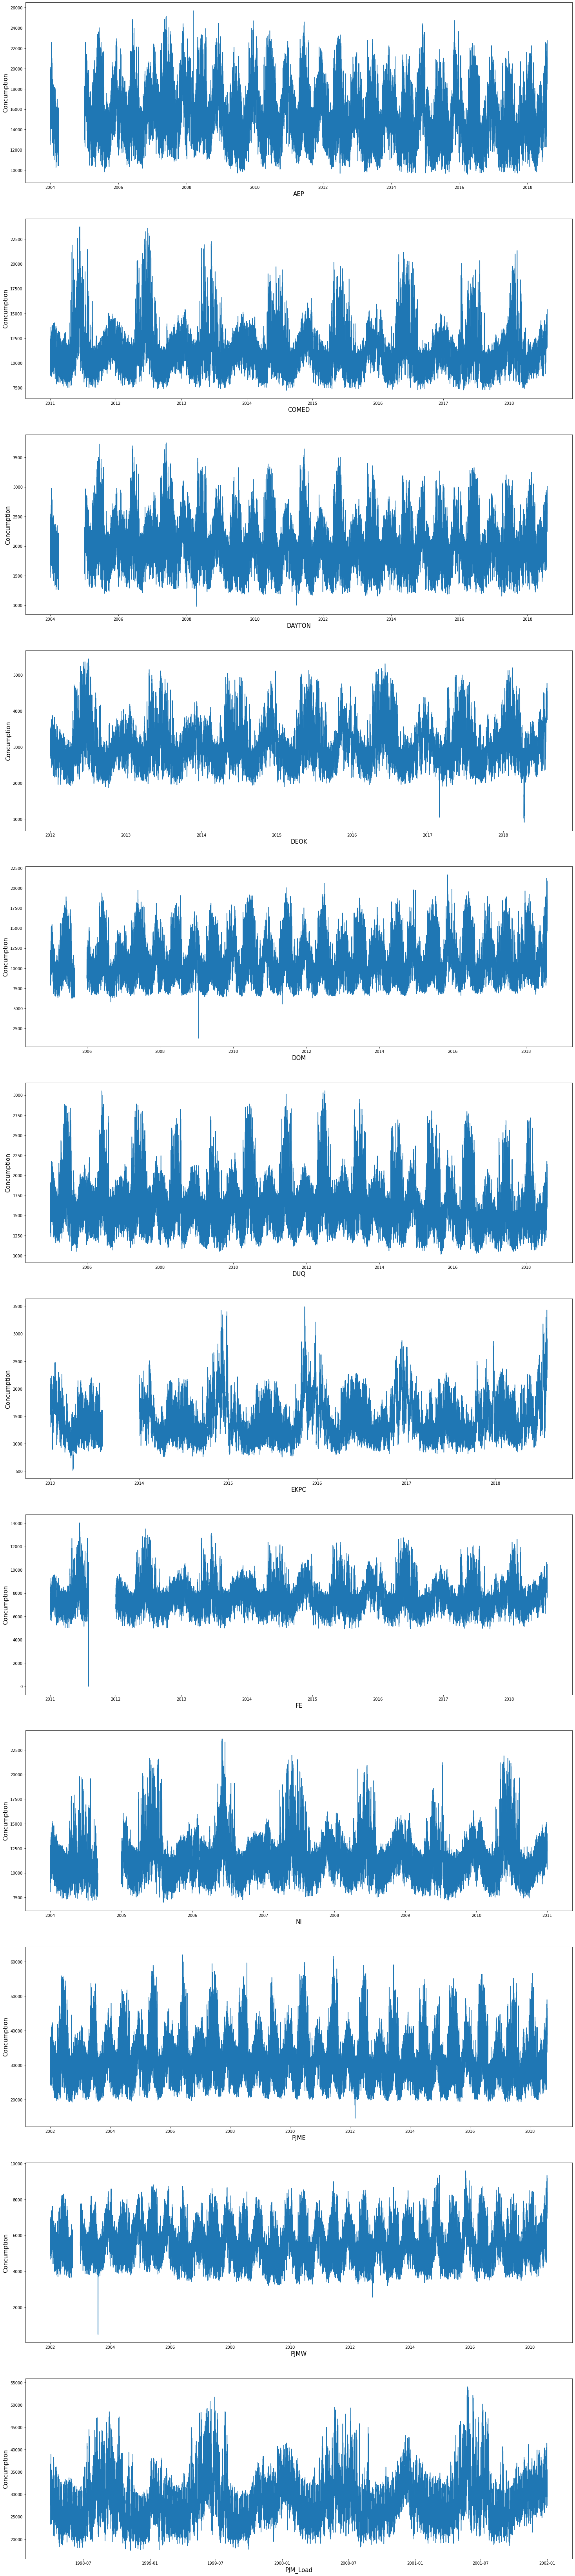

In [13]:
df=data.sort_index()
plt.figure(figsize = [25, 120])
for i,x in enumerate(data.columns[:12]):
    plt.subplot(12,1,i+1)
    plt.plot(df.index, data[x])
    plt.xlabel(x, fontsize=15)
    plt.ylabel('Concumption', fontsize=15)

1) We note a lake of informations for some companies (Ex FE in the end of year 2011 )

### Total Consumption evolution per year per company

In [14]:
#Ajouter une colone Total et année
data['Total']=data.apply(lambda x: x.sum(),axis=1)
data['annee'] = data.index.year

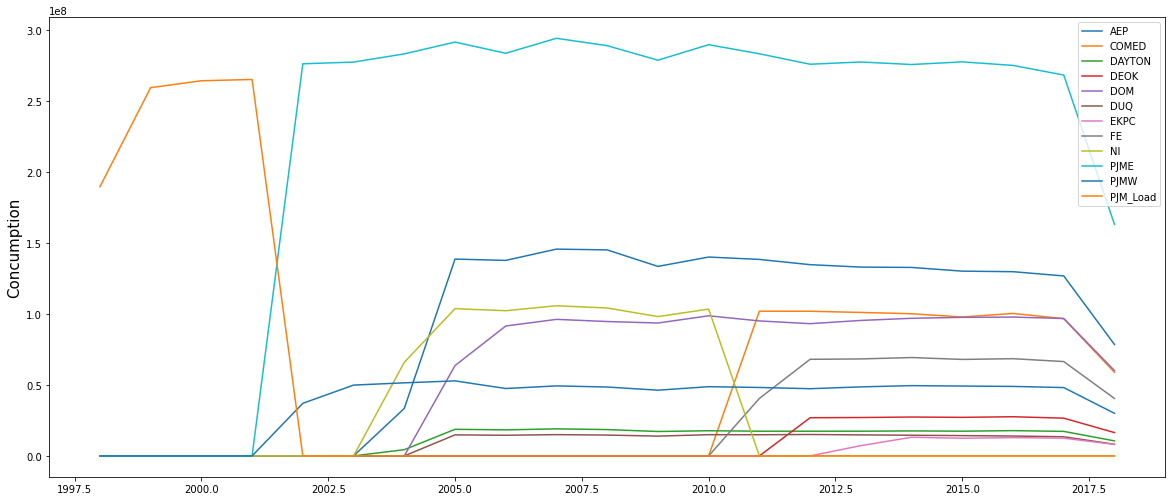

In [15]:
plt.figure(figsize = [20, 120])
for i,x in enumerate(data.columns[:12]):
    plt.subplot(12,1,1)
    plt.plot( data.groupby(['annee']).sum().index, data.groupby(['annee']).sum()[x])
    #plt.xlabel(x, fontsize=15)
    plt.ylabel('Concumption', fontsize=15)
    plt.legend(data.columns[:12])

1) PJM_Load s'est arreté en 2002
 
2) PJME est le plus grand producteur (distributeur)
 
3) The total consumtion per company is greater and more stable after 2005

<AxesSubplot:xlabel='Total', ylabel='Density'>

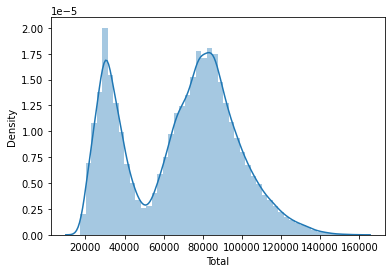

In [16]:
# Count Data in Dataset
import seaborn as sns
sns.distplot( data['Total'] )

1) we ca see that the data are concentrated between 50000 and 150000-200000 MW
2) we have less data at 100000 MW

# Data Cleanning

In [17]:
# Data Head
data.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load,Total,annee
Datetime,,,,,,,,,,,,,,
1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0,29309.0,1998
1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0,28236.0,1998
1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0,27692.0,1998
1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0,27596.0,1998
1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0,27888.0,1998


In [18]:
# Add time columns to the Data Set


## day_of_week:
# 0 - Monday
# 1 - Tuesday
# 2 - Wednesday
# 3 - Thursday
# 4 - Friday
# 5 - Saturday
# 6 - Sunday

data['date'] = data.index.date
data['annee'] = data.index.year
data['mois'] = data.index.month
data['semaine'] = data.index.weekofyear
data['heure'] = data.index.hour
data['jour_annee'] = data.index.dayofyear
data['trimestre'] = data.index.quarter
data['jour_semaine'] = data.index.dayofweek
data['jour_mois'] = data.index.day

In [19]:
data.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,...,Total,annee,date,mois,semaine,heure,jour_annee,trimestre,jour_semaine,jour_mois
Datetime,,,,,,,,,,,,,,,,,,,,,
1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29309.0,1998,1998-12-31,12,53,1,365,4,3,31
1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28236.0,1998,1998-12-31,12,53,2,365,4,3,31
1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27692.0,1998,1998-12-31,12,53,3,365,4,3,31
1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27596.0,1998,1998-12-31,12,53,4,365,4,3,31
1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27888.0,1998,1998-12-31,12,53,5,365,4,3,31


### Total Consumption evolution

Text(0, 0.5, 'Concumption')

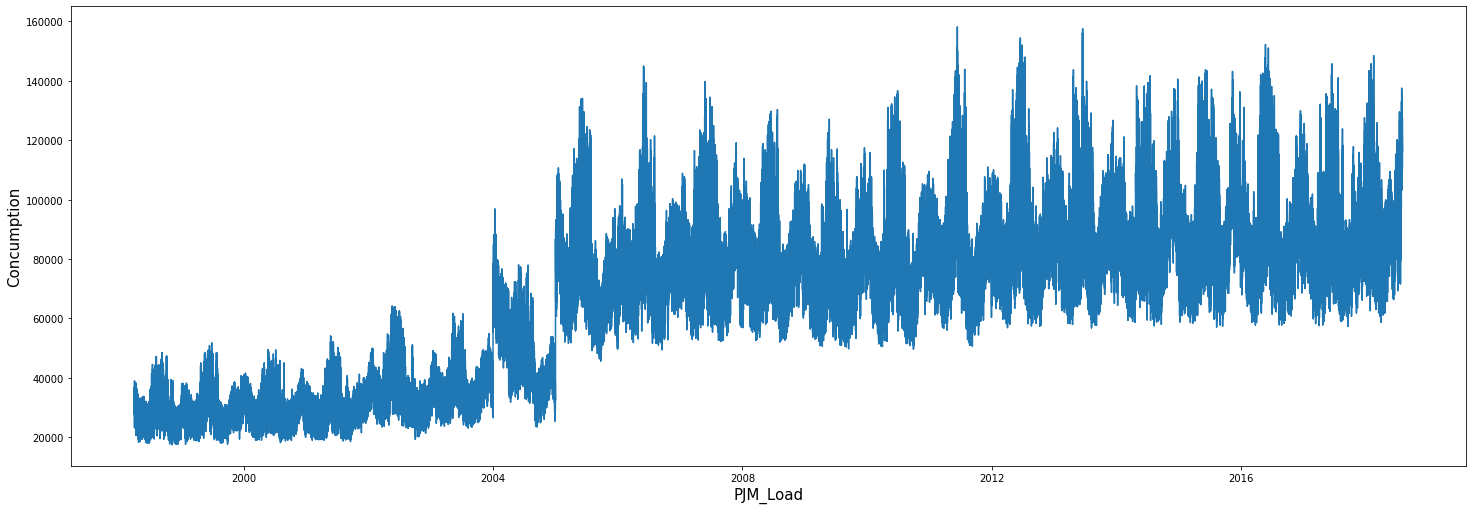

In [20]:
df=data.sort_index()
plt.figure(figsize = [25, 120])

plt.subplot(12,1,1)
plt.plot(df['date'], data['Total'])
plt.xlabel(x, fontsize=15)
plt.ylabel('Concumption', fontsize=15)

### Process duplicated Values

In [21]:
#DataSet shape
data.shape

(178262, 22)

In [22]:
# Process Duplicated Values
ids = data.index
data[ids.isin(ids[ids.duplicated()])]

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,...,Total,annee,date,mois,semaine,heure,jour_annee,trimestre,jour_semaine,jour_mois
Datetime,,,,,,,,,,,,,,,,,,,,,
2014-11-02 02:00:00,12994.0,8869.0,1623.0,2518.0,8555.0,1272.0,1554.0,6051.0,NaN,22935.0,...,70984.0,2014,2014-11-02,11,44,2,306,4,6,2
2014-11-02 02:00:00,13190.0,9184.0,1634.0,2562.0,8562.0,1240.0,1566.0,6185.0,NaN,23755.0,...,72449.0,2014,2014-11-02,11,44,2,306,4,6,2
2015-11-01 02:00:00,10785.0,8270.0,1324.0,2164.0,7392.0,1113.0,978.0,5653.0,NaN,21567.0,...,63173.0,2015,2015-11-01,11,44,2,305,4,6,1
2015-11-01 02:00:00,10542.0,7923.0,1292.0,2257.0,7345.0,1138.0,944.0,5455.0,NaN,21171.0,...,61899.0,2015,2015-11-01,11,44,2,305,4,6,1
2016-11-06 02:00:00,10964.0,7814.0,1334.0,2350.0,7924.0,1121.0,1042.0,5523.0,NaN,20795.0,...,62981.0,2016,2016-11-06,11,44,2,311,4,6,6
2016-11-06 02:00:00,11008.0,8028.0,1364.0,2198.0,8145.0,1107.0,1028.0,5587.0,NaN,21692.0,...,64246.0,2016,2016-11-06,11,44,2,311,4,6,6
2017-11-05 02:00:00,10596.0,8198.0,1449.0,2064.0,7677.0,1131.0,910.0,5573.0,NaN,21236.0,...,62876.0,2017,2017-11-05,11,44,2,309,4,6,5
2017-11-05 02:00:00,10446.0,7878.0,1331.0,1044.0,7468.0,1105.0,900.0,5467.0,NaN,20666.0,...,60289.0,2017,2017-11-05,11,44,2,309,4,6,5


we note 4 rows duplicated for the same houre that need deletion

In [23]:
# Drop duplicate and keep the last record
data_clean = data[~data.index.duplicated(keep='last')]

In [24]:
data_clean.shape

(178258, 22)

In [25]:
# Ckeck if duplicates are droped 
ids = data_clean.index
data_clean[ids.isin(ids[ids.duplicated()])]

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,...,Total,annee,date,mois,semaine,heure,jour_annee,trimestre,jour_semaine,jour_mois
Datetime,,,,,,,,,,,,,,,,,,,,,


In [26]:
data_clean.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,...,Total,annee,date,mois,semaine,heure,jour_annee,trimestre,jour_semaine,jour_mois
Datetime,,,,,,,,,,,,,,,,,,,,,
1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29309.0,1998,1998-12-31,12,53,1,365,4,3,31
1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28236.0,1998,1998-12-31,12,53,2,365,4,3,31
1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27692.0,1998,1998-12-31,12,53,3,365,4,3,31
1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27596.0,1998,1998-12-31,12,53,4,365,4,3,31
1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27888.0,1998,1998-12-31,12,53,5,365,4,3,31


In [27]:
#Data Set size
data_clean.shape

(178258, 22)

In [28]:
# Pour éviter de biaiser nos résultats on supprime les données entre 1998 à 2004
#drop lines befor 2004
data_clean=data_clean[data_clean['annee']>2004]

In [29]:
#Data Set size
data_clean.shape

(119065, 22)

<AxesSubplot:xlabel='Total', ylabel='Density'>

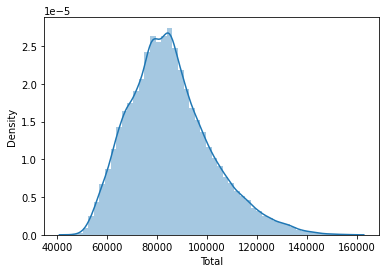

In [30]:
# plot the new distribution 
import seaborn as sns
sns.distplot( data_clean['Total'] )

We focuse this study to the total consumtion, we will drop the companies Datas

In [31]:
#Suppression des columns fournisseurs
data_clean=data_clean.reset_index()
data_clean=data_clean.drop(["AEP","COMED","DAYTON","DEOK","DOM","DUQ","EKPC","FE","NI","PJME","PJMW","PJM_Load"], axis=1)

In [32]:
#Reorganisation des colones
data_clean=data_clean.reindex(columns = ['Datetime','date','annee','mois', 'semaine','heure','jour_annee','trimestre','jour_semaine','jour_mois','Total'])

In [33]:
# Data Shape
data_clean.shape

(119065, 11)

In [34]:
#Data Types
data_clean.dtypes

Datetime        datetime64[ns]
date                    object
annee                    int64
mois                     int64
semaine                  int64
heure                    int64
jour_annee               int64
trimestre                int64
jour_semaine             int64
jour_mois                int64
Total                  float64
dtype: object

In [35]:
data_clean.head()

,Datetime,date,annee,mois,semaine,heure,jour_annee,trimestre,jour_semaine,jour_mois,Total
0,2005-01-01 00:00:00,2005-01-01,2005,1,53,0,1,1,5,1,56671.0
1,2005-12-31 01:00:00,2005-12-31,2005,12,52,1,365,4,5,31,71212.0
2,2005-12-31 02:00:00,2005-12-31,2005,12,52,2,365,4,5,31,68141.0
3,2005-12-31 03:00:00,2005-12-31,2005,12,52,3,365,4,5,31,66485.0
4,2005-12-31 04:00:00,2005-12-31,2005,12,52,4,365,4,5,31,65701.0


In [36]:
data_clean.groupby(['annee']).sum().describe()

,mois,semaine,heure,jour_annee,trimestre,jour_semaine,jour_mois,Total
count,14.00000,14.000000,14.000000,1.400000e+01,14.000000,14.000000,14.000000,1.400000e+01
mean,54572.50000,222174.428571,97818.000000,1.529614e+06,21051.071429,25507.285714,133704.928571,7.257895e+08
std,9709.76944,40632.296135,11155.638374,2.813251e+05,3495.608354,2949.344606,15533.833879,8.398970e+07
min,20837.00000,81117.000000,59061.000000,5.522650e+05,8906.000000,15262.000000,79744.000000,4.747759e+08
25%,57154.00000,231503.000000,100735.000000,1.602689e+06,21978.250000,26254.500000,137684.000000,7.004934e+08
50%,57154.00000,232709.500000,100735.000000,1.602706e+06,21979.000000,26281.000000,137699.500000,7.330025e+08
75%,57165.00000,232743.500000,100737.000000,1.603013e+06,21983.000000,26334.000000,137703.750000,7.885513e+08
max,57213.00000,236510.000000,101013.000000,1.611791e+06,22007.000000,26418.000000,138397.000000,7.975679e+08


In [37]:
#Count null values/row
data_clean.isna().sum()

Datetime        0
date            0
annee           0
mois            0
semaine         0
heure           0
jour_annee      0
trimestre       0
jour_semaine    0
jour_mois       0
Total           0
dtype: int64

In [38]:
#Add columns Season and Holydays 
import holidays
import datetime
import numpy as np
from datetime import date
#Winter=1
#Spring=2
#Summer=3
#Autumn=4

df1=data_clean.copy()
df1['season'] = df1['date'].apply( lambda x: 1 if x.month == 12 or x.month == 1 or x.month == 2 else 2 if  x.month == 3 or x.month == 4 or x.month == 5 else 3 if  x.month == 6 or x.month == 7 or x.month == 8 else 4 if  x.month == 9 or x.month == 10 or x.month == 11 else '')
df1['holidays'] = df1['date'].apply( lambda x: 'Holiday' if x in holidays.US(state=['OH','VI','IL','VA','WV','KY','PA']) else 'Holiday' if x + datetime.timedelta(days=1) in holidays.US(state=['OH','VI','IL','VA','WV','KY','PA']) else 'Normal day' )
#df1['week_end'] = df1['jour_semaine'].apply( lambda x: 'we' if x > 4 else 'nwe')
df1['day_off']=np.where((df1['jour_semaine']>4),0,1)
df1['day_off']=np.where((df1['holidays']=='Holiday'),df1['day_off'],0)

#drop week_ebd column
df1.drop(columns=['holidays'],axis=1,inplace=True)

In [39]:
#Final Data Set
data_clean=df1.copy()
data_clean.head()

,Datetime,date,annee,mois,semaine,heure,jour_annee,trimestre,jour_semaine,jour_mois,Total,season,day_off
0,2005-01-01 00:00:00,2005-01-01,2005,1,53,0,1,1,5,1,56671.0,1,0
1,2005-12-31 01:00:00,2005-12-31,2005,12,52,1,365,4,5,31,71212.0,1,0
2,2005-12-31 02:00:00,2005-12-31,2005,12,52,2,365,4,5,31,68141.0,1,0
3,2005-12-31 03:00:00,2005-12-31,2005,12,52,3,365,4,5,31,66485.0,1,0
4,2005-12-31 04:00:00,2005-12-31,2005,12,52,4,365,4,5,31,65701.0,1,0


In [40]:
data_clean.shape

(119065, 13)

In [41]:
# Drop day 215 of year 2018 & add the days missed in the dataset (with data of h+1 duplicated for h)

data_clean = data_clean.drop(data_clean[(data_clean.annee==2018)&(data_clean.jour_annee==215)].index)#.index


checkmonth=pd.DataFrame(data_clean.groupby(['jour_annee','annee'])['annee'].count())
checkmonth.rename(columns={'annee':'nb'}, inplace=True)
df_missing=checkmonth[checkmonth.nb!=24]
df_missing=df_missing.reset_index()

Hour0_24=pd.DataFrame(np.arange(24))
df_to_append=pd.DataFrame()

for x,y in zip(df_missing['jour_annee'],df_missing['annee']):
    df_encours=data_clean[(data_clean.jour_annee==x)&(data_clean.annee==y)]
    h_missing=Hour0_24[~Hour0_24[0].isin(df_encours.heure)]
    h=h_missing.iloc[0].name
    df_to_append=df_to_append.append(data_clean[(data_clean.jour_annee==x)&(data_clean.annee==y)&(data_clean.heure==(h+1))])
df_to_append.heure=df_to_append.heure-1
data_clean=data_clean.append(df_to_append)
data_clean.index=data_clean.Datetime
data_clean.drop(['Datetime'],axis=1,inplace=True)

# Explore the cleaned Data Set

In [42]:
data_clean.shape

(119088, 12)

In [43]:
data_clean.head()

,date,annee,mois,semaine,heure,jour_annee,trimestre,jour_semaine,jour_mois,Total,season,day_off
Datetime,,,,,,,,,,,,
2005-01-01 00:00:00,2005-01-01,2005,1,53,0,1,1,5,1,56671.0,1,0
2005-12-31 01:00:00,2005-12-31,2005,12,52,1,365,4,5,31,71212.0,1,0
2005-12-31 02:00:00,2005-12-31,2005,12,52,2,365,4,5,31,68141.0,1,0
2005-12-31 03:00:00,2005-12-31,2005,12,52,3,365,4,5,31,66485.0,1,0
2005-12-31 04:00:00,2005-12-31,2005,12,52,4,365,4,5,31,65701.0,1,0


## Consumption evolution in time

###### day_of_week:
 
0 - Monday 
1 - Tuesday 
2 - Wednesday
3 - Thursday 
4 - Friday 
5 - Saturday 
6 - Sunday
###### Seasons:
 
Winter=1 Spring=2 Summer=3 Autumn=4

### Bar Plots

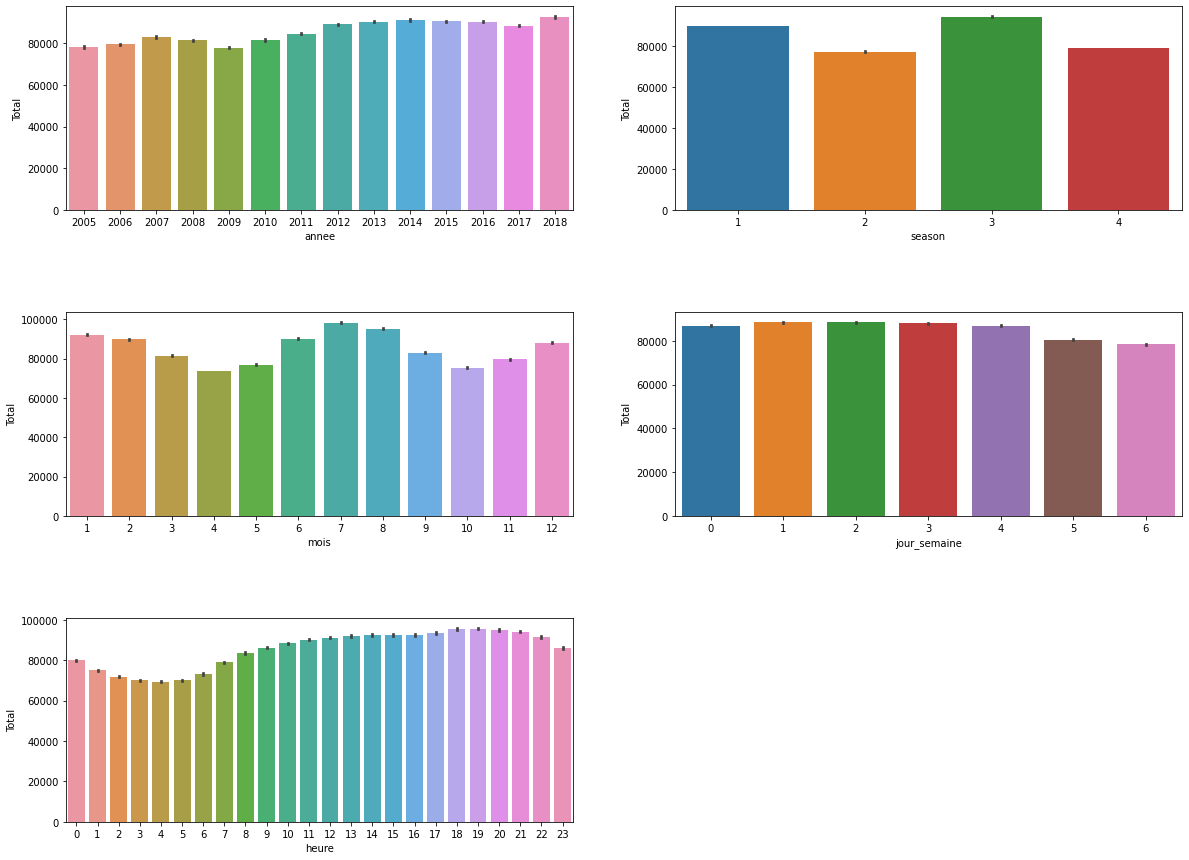

In [44]:
#Categorical_columns visualisation:
fig,axes = plt.subplots(3,2,figsize=(20,15))
for idx,cat_col in enumerate(['annee','season','mois','jour_semaine','heure']):
    row,col = idx//2,idx%2
    #sns.countplot(x=cat_col,data=loan_train,hue='Loan_Status',ax=axes[row,col])
    sns.barplot(x=cat_col, y=data_clean.Total, data=data_clean,ax=axes[row,col])
fig.delaxes(axes[2,1]) # remove empty subplot
plt.subplots_adjust(hspace=0.5)

### Box Plots

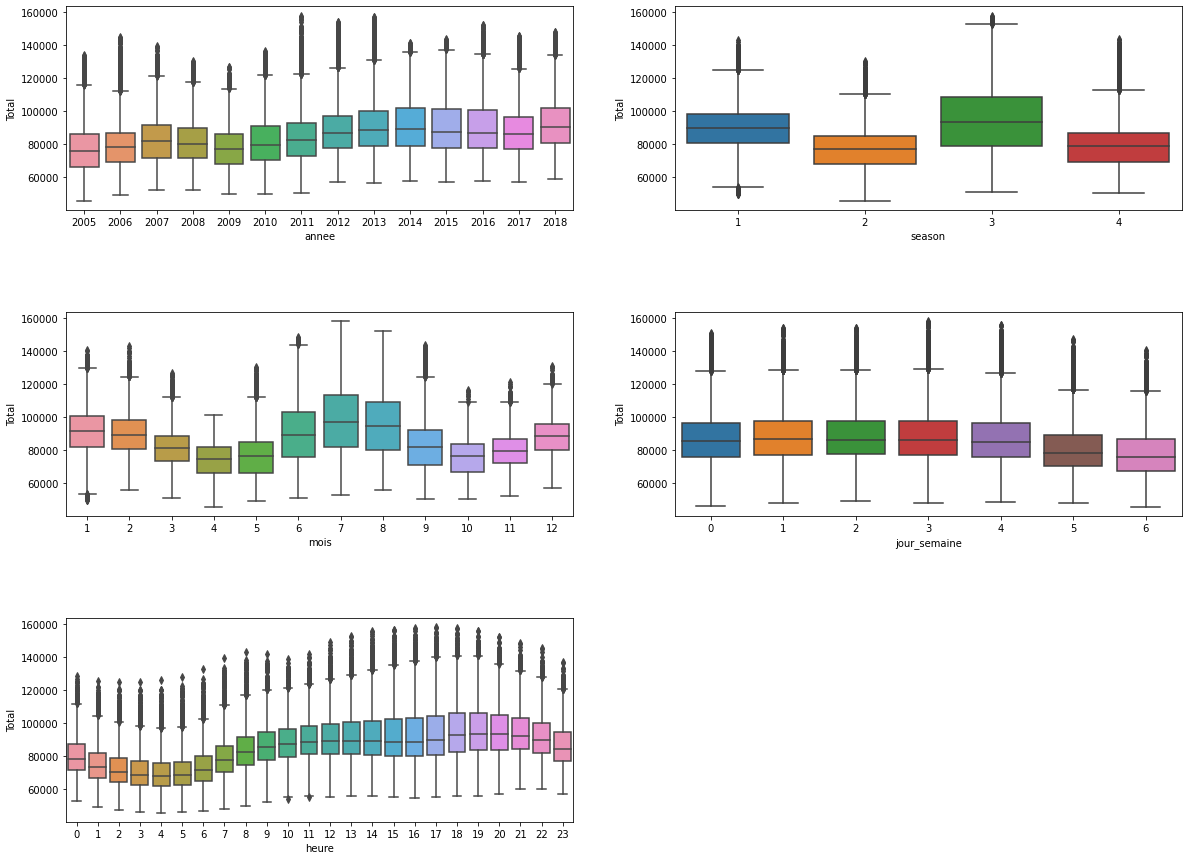

In [45]:
#Categorical_columns visualisation:
fig,axes = plt.subplots(3,2,figsize=(20,15))
for idx,cat_col in enumerate(['annee','season','mois','jour_semaine','heure']):
    row,col = idx//2,idx%2
    sns.boxplot(x=cat_col, y=data_clean.Total, data=data_clean,ax=axes[row,col])
fig.delaxes(axes[2,1]) # remove empty subplot
plt.subplots_adjust(hspace=0.5)

1) The comsumption is in permanent increase from 2005, 1) There is an important consumption decrease in 2008 (probabely linked to autumn 2008 financial crisis )
 
2) the consumption is higher in summer than winter, spring represent a minimum consumption
 
3) the consumption ihigher in jully that the rest of the months
 
4) the consumption is lower in the weekends than the rest the week days
 
5) The consumption progress after 5h and decease after 20h

### Lag Scatter Plots, Total Consumption per hour

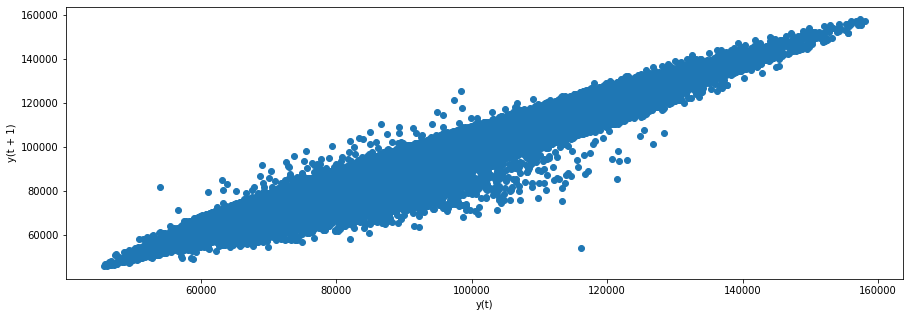

In [46]:
from pandas.plotting import lag_plot
from matplotlib import pyplot
plt.figure(figsize = [15, 5])
lag_plot(data_clean[['Total']],lag=1)
pyplot.show()

1) the points cluster along a diagonal line from the bottom-left to the top-right of the plot,it suggests a positive correlation relationship.

### Autocorrelation

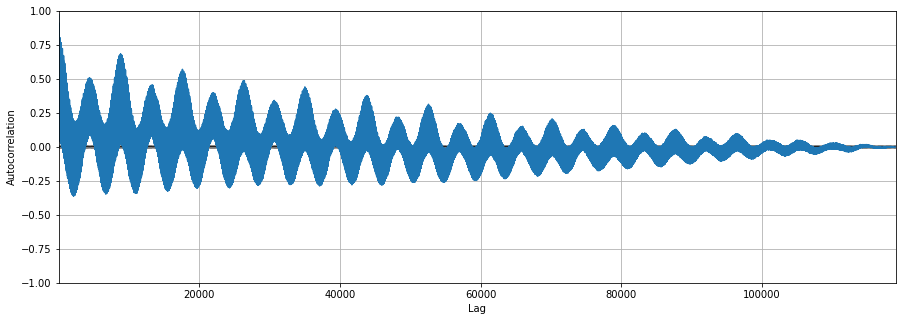

In [47]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize = [15, 5])
autocorrelation_plot(data_clean[['Total']])
pyplot.show()

Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

# Decompose Time Series Data

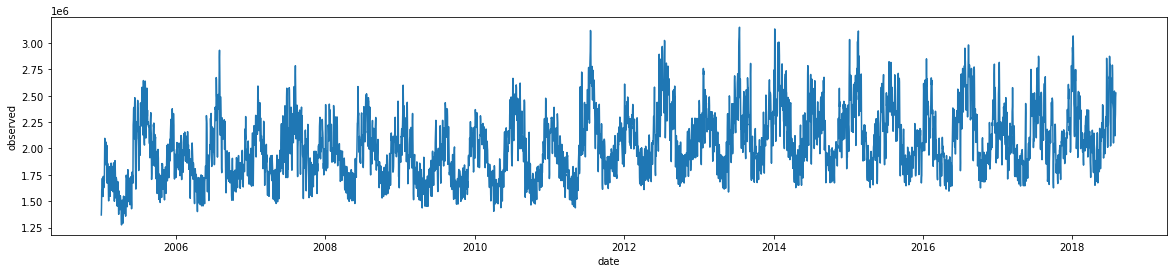

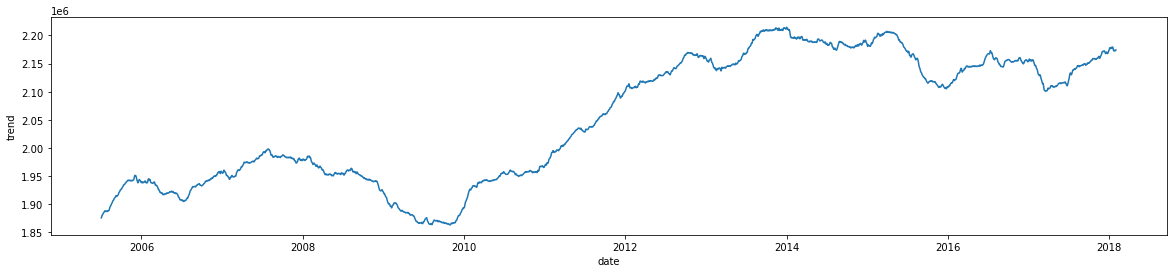

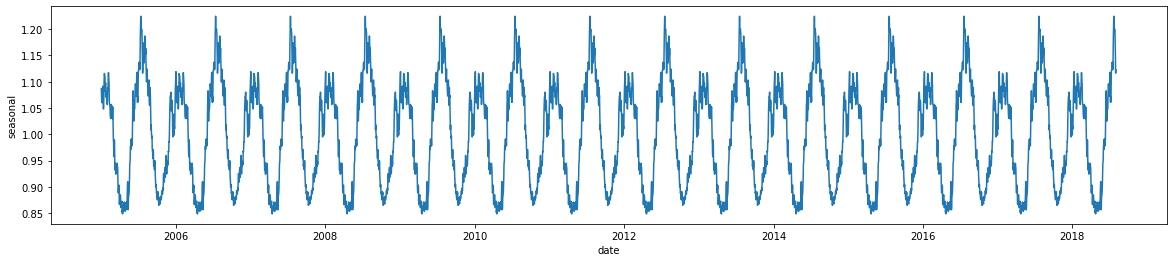

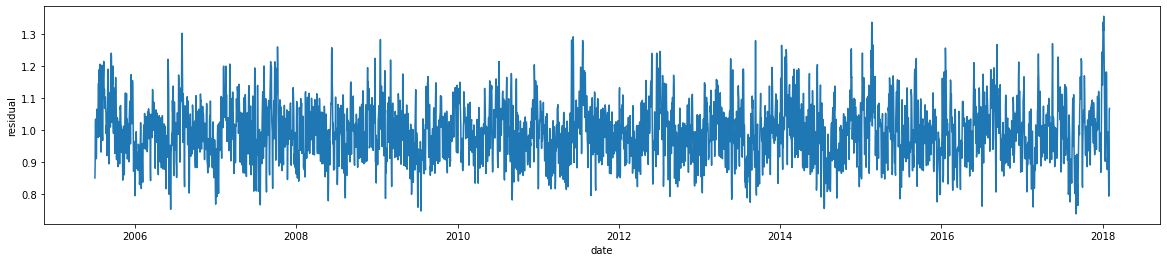

In [48]:
# additive decompose a contrived additive time series
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange
from matplotlib import pyplot

series = data_clean.groupby(['date']).sum().sort_values(by=['date'])['Total']
result = seasonal_decompose(series, model='multiplicative',freq=366)

plt.figure(figsize = [20, 4])
result.observed.plot(ylabel='observed')

pyplot.show()

plt.figure(figsize = [20, 4])
result.trend.plot(ylabel='trend')
pyplot.show()

plt.figure(figsize = [20, 4])
result.seasonal.plot(ylabel='seasonal')
pyplot.show()

plt.figure(figsize = [20, 4])
result.resid.plot(ylabel='residual')
pyplot.show()


# Machine Learning Models

### Persistence (reference result)
La première étape avant de passer à l'analyse et la modélisation des données est d'établir une référence de performance. Cela fournira à la fois un modèle pour évaluer les modèles en utilisant les "harnais'" de test et une mesure de la performance par laquelle tous les modèles prédictifs plus élaborés peuvent être comparés. 

La prédiction de base pour la prévision de séries chronologiques est appelée prévision naïve, ou persistance. C'est là que l'observation du pas de temps précédent est utilisée comme prédiction pour l'observation au prochain pas de temps. (valeur prédite = valeur du timestep précédent)

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Feature = Total de la consommation électrique par jour
X = data_clean.groupby(['date']).sum().sort_values(by=['date'])['Total']

# Echantillons d'apprentissage et de validation 
train_rate = 0.50
train_size = int(len(X) * train_rate)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation => valeur prédite = valeur de la veille
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
    
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


>Predicted=1834659.000, Expected=1874462.000
>Predicted=1874462.000, Expected=1918336.000
>Predicted=1918336.000, Expected=1924230.000
>Predicted=1924230.000, Expected=1883493.000
>Predicted=1883493.000, Expected=1720408.000
>Predicted=1720408.000, Expected=1675728.000
>Predicted=1675728.000, Expected=1868327.000
>Predicted=1868327.000, Expected=1881929.000
>Predicted=1881929.000, Expected=1881498.000
>Predicted=1881498.000, Expected=1901229.000
>Predicted=1901229.000, Expected=1946593.000
>Predicted=1946593.000, Expected=1876462.000
>Predicted=1876462.000, Expected=1808732.000
>Predicted=1808732.000, Expected=1996025.000
>Predicted=1996025.000, Expected=1968947.000
>Predicted=1968947.000, Expected=1964948.000
>Predicted=1964948.000, Expected=1947074.000
>Predicted=1947074.000, Expected=1907024.000
>Predicted=1907024.000, Expected=1828615.000
>Predicted=1828615.000, Expected=1781151.000
>Predicted=1781151.000, Expected=1940522.000
>Predicted=1940522.000, Expected=1930135.000
>Predicted

>Predicted=2350151.000, Expected=2449346.000
>Predicted=2449346.000, Expected=2321581.000
>Predicted=2321581.000, Expected=2317185.000
>Predicted=2317185.000, Expected=2405696.000
>Predicted=2405696.000, Expected=2345841.000
>Predicted=2345841.000, Expected=2163326.000
>Predicted=2163326.000, Expected=1937378.000
>Predicted=1937378.000, Expected=2065440.000
>Predicted=2065440.000, Expected=2157898.000
>Predicted=2157898.000, Expected=2110575.000
>Predicted=2110575.000, Expected=2161831.000
>Predicted=2161831.000, Expected=2286794.000
>Predicted=2286794.000, Expected=2165387.000
>Predicted=2165387.000, Expected=2099850.000
>Predicted=2099850.000, Expected=2269861.000
>Predicted=2269861.000, Expected=2427744.000
>Predicted=2427744.000, Expected=2544984.000
>Predicted=2544984.000, Expected=2668878.000
>Predicted=2668878.000, Expected=2665831.000
>Predicted=2665831.000, Expected=2602835.000
>Predicted=2602835.000, Expected=2645159.000
>Predicted=2645159.000, Expected=2642214.000
>Predicted

In [52]:
print('% erreur / consommation électrique quotidienne : {:.2%} du minimum - {:.2%} du maximum'.format(rmse/X.min(),rmse/X.max()))

% erreur / consommation électrique quotidienne : 11.78% du minimum - 4.77% du maximum


Le RMSE du test de persistence est de 150234.588
 
En moyenne la valeur prédite a une erreur de 150234 MW

# ARIMA Models

In this section, we will develop Autoregressive Integrated Moving Average or ARIMA models
for the problem. We will approach modeling by both manual and automatic configuration of
the ARIMA model. This will be followed by a third step of investigating the residual errors of
the chosen model. As such, this section is broken down into 3 steps:
    
1. Manually Configure the ARIMA.
 
2. Automatically Configure the ARIMA.
 
3. Review Residual Errors.


#### Manually Configured ARIMA (Baseline)

The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.
Analysis of the time series data assumes that we are working with a stationary time series. The
time series is likely non-stationary. We can make it stationary by first differencing the series
and using a statistical test to confirm that the result is stationary. The example below creates a
stationary version of the series.
 
p est le nombre de termes auto-régressifs
 
d est le nombre de différences
 
q est le nombre de moyennes mobiles.

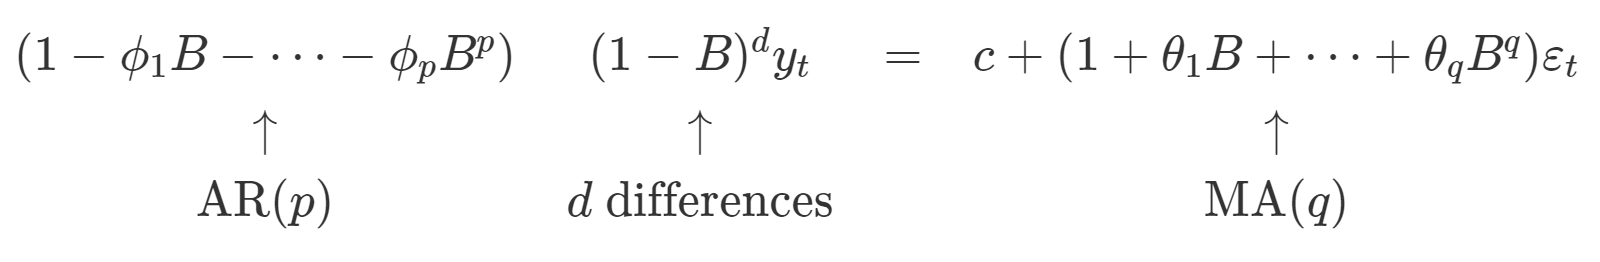
 

ADF Statistic: -14.719235
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


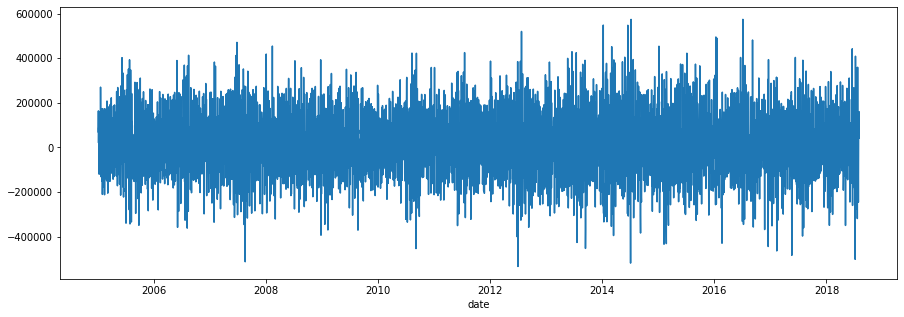

In [54]:
# create and summarize a stationary version of the time series
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

# create a differenced series
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return Series(diff)

#series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

series=data_clean.groupby(['date']).sum().sort_values(by=['date'])['Total']

X = series.values
X = X.astype('float32')

# difference data
stationary = difference(X)
stationary.index = series.index[1:]

# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# # plot differenced data
plt.figure(figsize = [15, 5])
stationary.plot()
pyplot.show()

Running the example outputs the result of a statistical significance test of whether the
differenced series is stationary. Specifically, the augmented Dickey-Fuller test. The results show
that the test statistic value -14.719235 is smaller than the critical value at 1% of -3.432. This
suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a
low probability that the result is a statistical 
uke). Rejecting the null hypothesis means that
the process has no unit root, and in turn that the time series is stationary or does not have
time-dependent structure.
 
This suggests that at least one level of differencing is required. The d parameter in our ARIMA model should at least be a value of 1. A plot of the dierenced data is also created. It suggests that this has indeed removed the increasing trend.

The next first step is to select the lag values for the Autoregression (AR) and Moving Average
(MA) parameters, p and q respectively. We can do this by reviewing Autocorrelation Function
(ACF) and Partial Autocorrelation Function (PACF) plots. The example below creates ACF
and PACF plots for the series.

## Search ARIMA Hyperparameters using Autocorrelation and Partial Autocorrelation

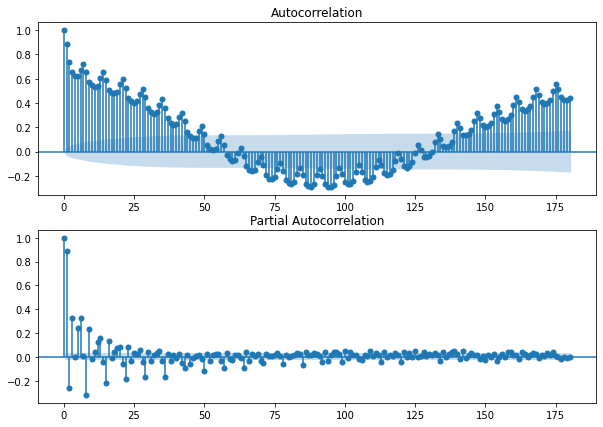

In [55]:
# ACF and PACF plots of the time series
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = data_clean.groupby(['date']).sum().sort_values(by=['date'])['Total']
#series = data_clean.groupby(['annee']).sum().sort_values(by=['annee'])['Total']
pyplot.figure(figsize=(10,7))
pyplot.subplot(211)
# plot_acf(series, lags=53, ax=pyplot.gca())
plot_acf(series, lags=180, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, lags=180, ax=pyplot.gca())
pyplot.show()

A good starting point for the p is 52 and q is 4
 
This quick analysis suggests an ARIMA(52,1,4) on the raw data may be a good starting point.
 
######                          ""Running ARIMA Model with params ARIMA(52,1,4) will take much time""


In [ ]:
# # evaluate a manually configured ARIMA model
# from pandas import read_csv
# from sklearn.metrics import mean_squared_error
# from statsmodels.tsa.arima_model import ARIMA
# from math import sqrt
# # load data
# series = data_clean.groupby(['date']).sum().sort_values(by=['date'])['Total']

# # prepare data
# X = series.values
# X = X.astype('float32')
# train_size = int(len(X) * 0.50)
# train, test = X[0:train_size], X[train_size:]

# # walk-forward validation
# history = [x for x in train]
# predictions = list()
# for i in range(len(test)):
#     # predict
#     model = ARIMA(history, order=(52,1,4))
#     model_fit = model.fit(disp=0)
#     yhat = model_fit.forecast()[0]
#     predictions.append(yhat)
#     # observation
#     obs = test[i]
#     history.append(obs)
#     print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# # report performance
# rmse = sqrt(mean_squared_error(test, predictions))
# print('RMSE: %.3f' % rmse)

## Search ARIMA Hyprtparameters using Grid Search

In [ ]:
# # evaluate an ARIMA model for a given order (p,d,q) and return RMSE
# def evaluate_arima_model(X, arima_order):
#     # prepare training dataset
#     X = X.astype('float32')
#     train_size = int(len(X) * 0.50)
#     train, test = X[0:train_size], X[train_size:]
#     history = [x for x in train]
#     # make predictions
#     predictions = list()
#     for t in range(len(test)):
#         model = ARIMA(history, order=arima_order)
#         # model_fit = model.fit(disp=0)
#         model_fit = model.fit(trend='nc', disp=0)
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         history.append(test[t])
#     # calculate out of sample error
#     rmse = sqrt(mean_squared_error(test, predictions))
#     return rmse

# # evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
#     dataset = dataset.astype('float32')
#     best_score, best_cfg = float("inf"), None
#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 order = (p,d,q)
#                 try:
#                     rmse = evaluate_arima_model(dataset, order)
#                     if rmse < best_score:
#                         best_score, best_cfg = rmse, order
#                     print('ARIMA%s RMSE=%.3f' % (order,rmse))
#                 except:
#                     continue
#     print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
# # load dataset
# series = data_clean.groupby(['date']).sum().sort_values(by=['date'])['Total']
# # evaluate parameters
# p_values = range(0, 5)
# d_values = range(0, 3)
# q_values = range(0, 5)
# warnings.filterwarnings("ignore")
# evaluate_models(series.values, p_values, d_values, q_values)

Best ARIMA(4, 1, 3) RMSE=112922.507   <=== calculated in Anydesk

# Univariate LSTM Models (naive Model)

#### 1 - split a univariate sequence into samples function

In [80]:
# univariate lstm example
from numpy import array
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers


# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

#### 2 - Load, Split into samples and reshap the data

In [81]:
# define input sequence
raw_seq = list(data_clean.groupby(['date']).sum().sort_values(by=['date'])['Total'])

# choose a number of time steps
n_steps = 90

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

#### 3 - Create and compile the Model

In [82]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['MSE','MAPE'])

#Model Summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


#### 4 - fit the Model

In [84]:
# fit model
history=model.fit(X, y, epochs=200, validation_split=0.2,verbose=1)

Accuracy Params ==> Epoch 200/200
122/122 [==============================] - 84s 687ms/step - loss: 15802425135.8699 - MSE: 15802425135.8699 - MAPE: 4.8030 - val_loss: 17563389952.0000 - val_MSE: 17563389952.0000 - val_MAPE: 4.6775
 
###### RMSE: 132526.9

#### 5 - Plot the loss and MSE

In [ ]:
#Affichage
import matplotlib.pyplot as plt
# list all data in history
# summarize history for accuracy
plt.plot(history.history['MSE'][2:])
plt.plot(history.history['val_MSE'][2:])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#### 6 - Prediction

In [ ]:
lag=180
predictions=[]
x_input=X[-1]
for i in range(lag):
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    predictions=np.append(predictions,yhat)
    x_input=np.append(x_input,yhat)
    x_input = np.delete(x_input, 0)
print(predictions)

# Univariate LSTM Models (improved Model)

For this model we will use the same X and y from precedents stemps 1- &from naive Model

#### 2 - Load, Split into samples and reshap the data

In [77]:
# define input sequence
raw_seq = list(data_clean.groupby(['date']).sum().sort_values(by=['date'])['Total'])

# choose a number of time steps ?
n_steps = 120

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

#### 3 - Create and compile the Model

In [78]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))

#Compile Model
model.compile(optimizer='adam', loss='mse',metrics=['MSE','MAPE'])

#Model Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 13,001
Trainable params: 13,001
Non-trainable params: 0
_________________________________________________________________


#### 4 - fit the Model

In [85]:
# fit model
history=model.fit(X, y, epochs=200, validation_split=0.2,verbose=1)

Best Score calculated in Anydesk:
 
Epoch 197/200
step180
120/120 [==============================] - 15s 126ms/step - loss: 36834578059.6364 - MSE: 36834578059.6364 - MAPE: 7.4548 - val_loss: 16941616128.0000 - val_MSE: 16941616128.0000 - val_MAPE: 4.5674
 
==> RMSE: 130159
 
Epoch 171/200
step120
122/122 [==============================] - 11s 86ms/step - loss: 33084759414.6341 - MSE: 33084759414.6341 - MAPE: 7.0815 - val_loss: 13723679744.0000 - val_MSE: 13723679744.0000 - val_MAPE: 4.2155
==> RMSE: 117148

#### 5 - Plot the loss and MSE

In [ ]:
#Affichage
import matplotlib.pyplot as plt
# list all data in history
# summarize history for accuracy
plt.plot(history.history['MSE'][2:])
plt.plot(history.history['val_MSE'][2:])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#### 6 - Prediction

In [ ]:
lag=180
predictions=[]
x_input=X[-1]
for i in range(lag):
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    predictions=np.append(predictions,yhat)
    x_input=np.append(x_input,yhat)
    x_input = np.delete(x_input, 0)
print(predictions)